11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 65ms/step - accuracy: 0.7862 - loss: 0.6691 - val_accuracy: 0.9827 - val_loss: 0.0624
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.9674 - loss: 0.1129 - val_accuracy: 0.9860 - val_loss: 0.0480
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.9775 - loss: 0.0781 - val_accuracy: 0.9882 - val_loss: 0.0418
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.9811 - loss: 0.0636 - val_accuracy: 0.9903 - val_loss: 0.0373
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.9857 - loss: 0.0493 - val_accuracy: 0.9902 - val_loss: 0.0372
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.9871 - loss: 0.0409 - val_accuracy: 0.9915 - val_loss: 0.0338
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.9886 - loss: 0.0393 - val_accuracy: 0.9917 - val_loss: 0.0338
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.9894 - loss: 0.0335 - 

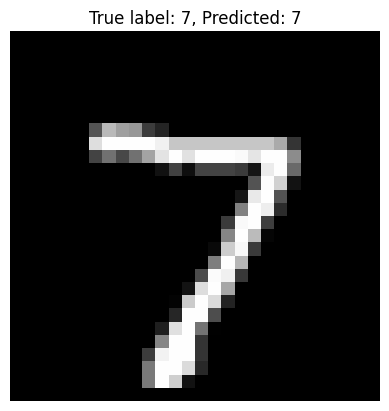

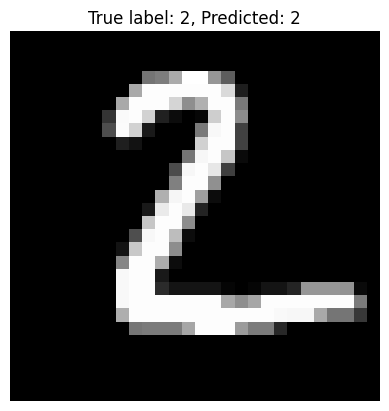

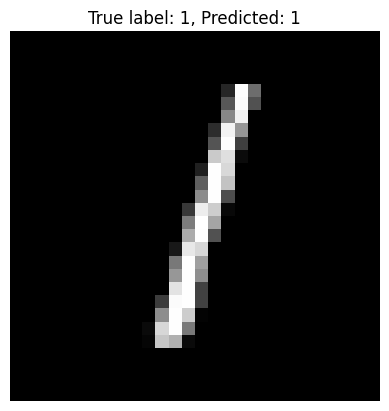

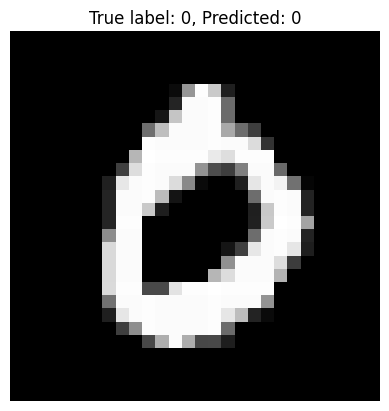

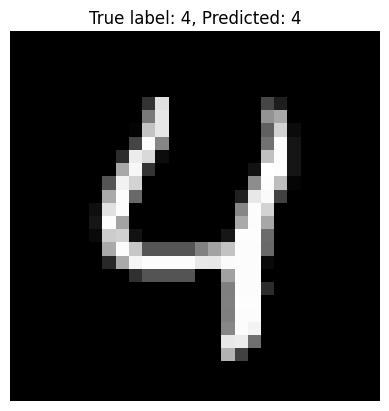

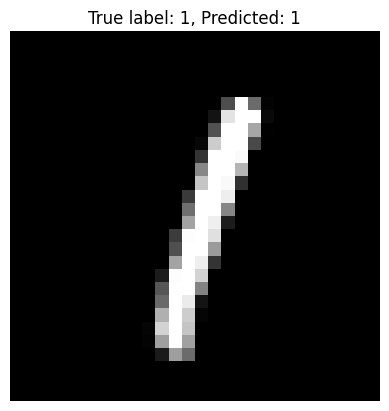

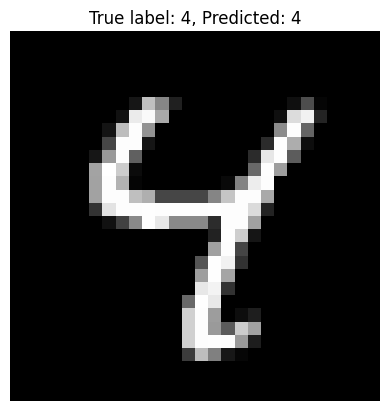

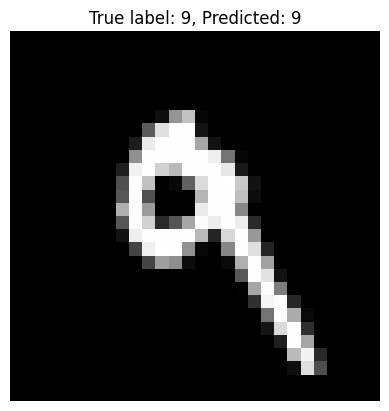

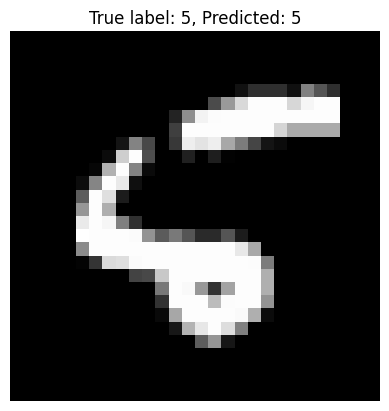

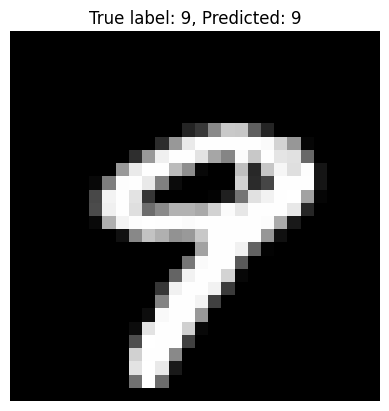

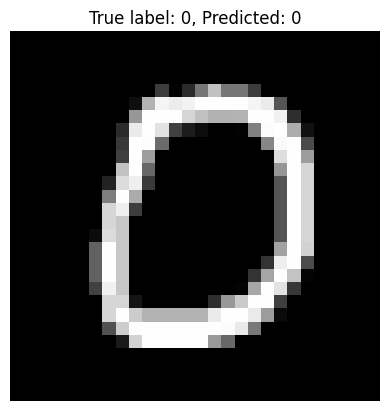

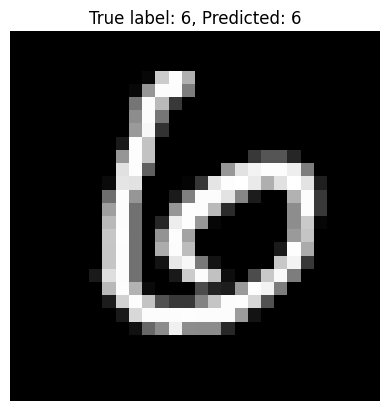

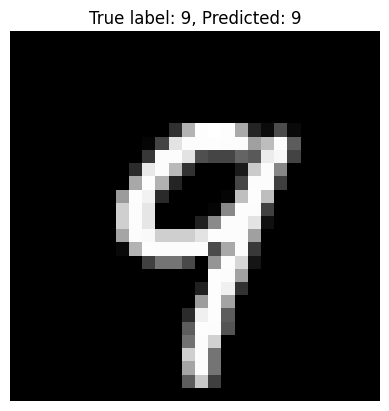

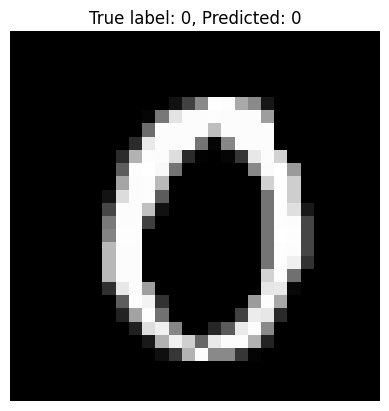

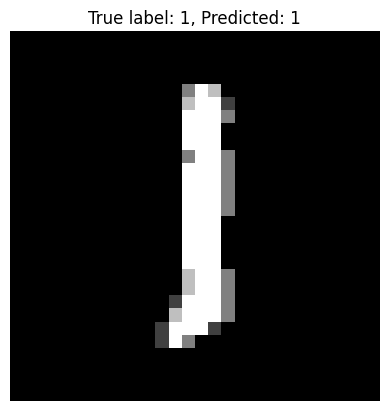

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

def load_and_preprocess_data():
    # Load the MNIST dataset
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalize the images to [0, 1] range
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # Reshape the data to include channel dimension
    x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
    x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

    # One-hot encode the labels
    num_classes = 10
    y_train = tf.keras.utils.to_categorical(y_train, num_classes)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes)

    return x_train, y_train, x_test, y_test

def build_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

def compile_model(model):
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_model(model, x_train, y_train):
    history = model.fit(x_train, y_train,
                        epochs=20,
                        batch_size=128,
                        validation_split=0.1)
    return history

def evaluate_model(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'\nTest accuracy: {test_acc:.4f}')
    return test_loss, test_acc

def plot_predictions(model, x_test, y_test, num_samples=5):
    predictions = model.predict(x_test[:num_samples])

    for i in range(num_samples):
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True label: {np.argmax(y_test[i])}, Predicted: {np.argmax(predictions[i])}")
        plt.axis('off')
        plt.show()

def main():
    # Load and preprocess data
    x_train, y_train, x_test, y_test = load_and_preprocess_data()

    # Build the model
    input_shape = (28, 28, 1)
    num_classes = 10
    model = build_model(input_shape, num_classes)

    # Compile the model
    model = compile_model(model)

    # Train the model
    history = train_model(model, x_train, y_train)

    # Evaluate the model
    evaluate_model(model, x_test, y_test)

    # Plot some predictions
    plot_predictions(model, x_test, y_test, num_samples=15)

if __name__ == "__main__":
    main()
def plot_sample(index):
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"Actual: {y_test[index]}, Predicted: {model.predict_classes(x_test)[index]}")
    plt.show()
